In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import fdringdown as rd
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

from plot_utils import rcparams, c_t0_prior, conversion, t_ref, Mf_det
plt.rcParams.update(rcparams)

In [18]:
# GWTC 2.1 parameters
Mf_gwosc = Mf_det
chif_gwosc = 0.62

# Capano parameters
Mf_cap = 328
chif_cap = 0.86

In [2]:
t0_choices = np.arange(-10, 26, 5)

# Normal
run_dict_normal = {
    '1W220': [16, 17, 18, 19, 20, 21, 22, 23],
    '1W220221': [21, 22, 23, 24, 25, 26, 27, 28],
    '1W220330': [31, 16, 17, 18, 19, 20, 21, 22],
    }

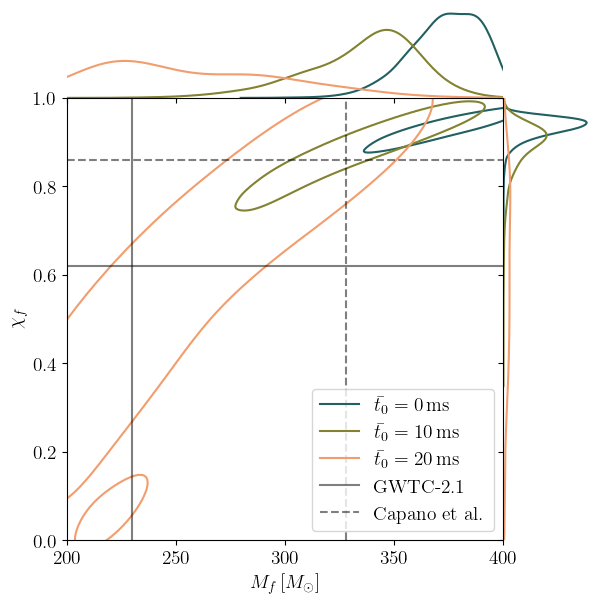

In [31]:
run_dict = run_dict_normal
run_type = '1W220'

mass_lim = (200, 400)
spin_lim = (0, 1)
bw = 2

# Handles and labels for legend
handles = []
labels = []

g = sns.JointGrid(space=0)

for i, run_number in enumerate(run_dict[run_type]):
    
    if i in [2, 4, 6]:

        c = c_t0_prior[i]
        t0 = t0_choices[i]

        posterior = pd.read_csv(
            f'../../runs/GW190521/{run_type}/{run_number:02d}/posterior_samples.dat'
            ).sample(n=10000)

        # 1d mass
        sns.kdeplot(
            x=posterior['M_f'], 
            bw_adjust=bw, 
            color=c,
            ax=g.ax_marg_x
        )
        g.ax_marg_x.set_xlim(mass_lim)

        # 1d spin
        sns.kdeplot(
            y=posterior['chi_f'], 
            bw_adjust=bw, 
            color=c, 
            ax=g.ax_marg_y
        )
        g.ax_marg_y.set_ylim(spin_lim)

        # 2d mass-spin
        sns.kdeplot(
            x=posterior['M_f'], 
            y=posterior['chi_f'], 
            color=c, 
            ax=g.ax_joint,
            bw_adjust=bw, 
            levels=[0.1],
        ) 
        
        handles.append(Line2D([0],[0],color=c))
        labels.append(rf'$\bar{{t_0}} = {t0}\,\mathrm{{ms}}$')

handles.append(Line2D([0],[0],color='k',alpha=0.5))
labels.append('GWTC-2.1')
        
g.ax_joint.axvline(Mf_gwosc, c='k', alpha=0.5)
g.ax_joint.axhline(chif_gwosc, c='k', alpha=0.5)

# g.ax_marg_x.axvline(Mf_gwosc, c='k', alpha=0.5)
# g.ax_marg_y.axhline(chif_gwosc, c='k', alpha=0.5)

handles.append(Line2D([0],[0],color='k',ls='--',alpha=0.5))
labels.append('Capano et al.')

g.ax_joint.axvline(Mf_cap, c='k', ls='--', alpha=0.5)
g.ax_joint.axhline(chif_cap, c='k', ls='--', alpha=0.5)

# g.ax_marg_x.axvline(Mf_cap, c='k', ls='--', alpha=0.5)
# g.ax_marg_y.axhline(chif_cap, c='k', ls='--', alpha=0.5)
        
g.ax_joint.set_xlim(mass_lim)
g.ax_joint.set_ylim(spin_lim)

g.ax_joint.set_xlabel(r'$M_f\,[M_\odot]$')
g.ax_joint.set_ylabel(r'$\chi_f$')

g.ax_joint.legend(handles, labels, loc='lower right')
        
plt.savefig('mass_spin_fundamental.pdf', bbox_inches='tight')

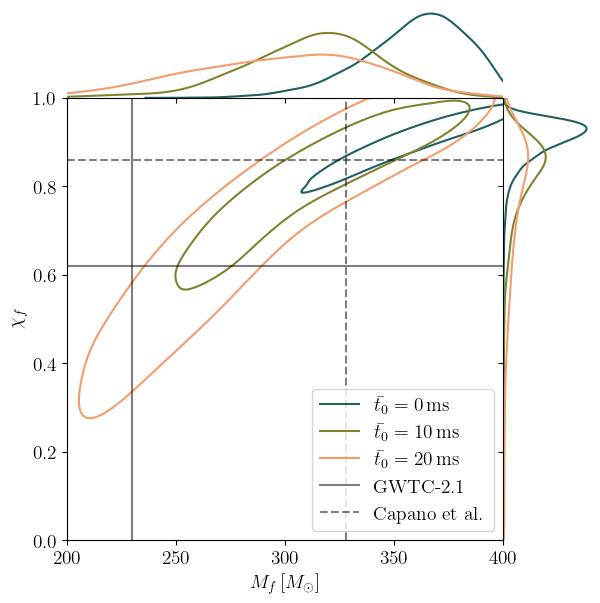

In [33]:
run_dict = run_dict_normal
run_type = '1W220330'

mass_lim = (200, 400)
spin_lim = (0, 1)
bw = 1.5

# Handles and labels for legend
handles = []
labels = []

g = sns.JointGrid(space=0)

for i, run_number in enumerate(run_dict[run_type]):
    
    if i in [2, 4, 6]:

        c = c_t0_prior[i]
        t0 = t0_choices[i]

        posterior = pd.read_csv(
            f'../../runs/GW190521/{run_type}/{run_number:02d}/posterior_samples.dat'
            ).sample(n=10000)

        # 1d mass
        sns.kdeplot(
            x=posterior['M_f'], 
            bw_adjust=bw, 
            color=c,
            ax=g.ax_marg_x
        )
        g.ax_marg_x.set_xlim(mass_lim)

        # 1d spin
        sns.kdeplot(
            y=posterior['chi_f'], 
            bw_adjust=bw, 
            color=c, 
            ax=g.ax_marg_y
        )
        g.ax_marg_y.set_ylim(spin_lim)

        # 2d mass-spin
        sns.kdeplot(
            x=posterior['M_f'], 
            y=posterior['chi_f'], 
            color=c, 
            ax=g.ax_joint,
            bw_adjust=bw, 
            levels=[0.1],
        ) 
        
        handles.append(Line2D([0],[0],color=c))
        labels.append(rf'$\bar{{t_0}} = {t0}\,\mathrm{{ms}}$')

handles.append(Line2D([0],[0],color='k',alpha=0.5))
labels.append('GWTC-2.1')
        
g.ax_joint.axvline(Mf_gwosc, c='k', alpha=0.5)
g.ax_joint.axhline(chif_gwosc, c='k', alpha=0.5)

# g.ax_marg_x.axvline(Mf_gwosc, c='k', alpha=0.5)
# g.ax_marg_y.axhline(chif_gwosc, c='k', alpha=0.5)

handles.append(Line2D([0],[0],color='k',ls='--',alpha=0.5))
labels.append('Capano et al.')

g.ax_joint.axvline(Mf_cap, c='k', ls='--', alpha=0.5)
g.ax_joint.axhline(chif_cap, c='k', ls='--', alpha=0.5)

# g.ax_marg_x.axvline(Mf_cap, c='k', ls='--', alpha=0.5)
# g.ax_marg_y.axhline(chif_cap, c='k', ls='--', alpha=0.5)
        
g.ax_joint.set_xlim(mass_lim)
g.ax_joint.set_ylim(spin_lim)

g.ax_joint.set_xlabel(r'$M_f\,[M_\odot]$')
g.ax_joint.set_ylabel(r'$\chi_f$')

g.ax_joint.legend(handles, labels, loc='lower right')
        
plt.savefig('mass_spin_harmonic.pdf', bbox_inches='tight')